### Ex.1

A perpetual bond (known also as a console) is a financial instrument characterised with coupon $c$ (which is assumed to be paid out annually) and
principal $P$. For such a bond, a bond holder gets $cP$ amound of money at
the end of each year for infinty. The perpetual bond does not have therefore
any maturity time. The value of the bond at time $t = 0$ is equal to the
present value of the underlying cashflows.

1. Assume that the interest rate at time $t = 0$ is flat and equal $r$. Prove
that the value of a perpetual bond is given by $\frac{cP}{r}$ 

$V_0=\sum_{n=1}^{\infty} \frac{cP}{(1+r)^n}=\sum_{n=0}^{\infty} \frac{cP}{1+r}\frac{1}{(1+r)^n}=\frac{cP}{1+r}\frac{1}{1-\frac{1}{1+r}}=\frac{cP}{1+r}\frac{1}{\frac{r}{1+r}}=\frac{cP}{1+r}\frac{1+r}{r}=\frac{cP}{r}$

2. Prove that the duration of a perpetual bond is given by $\frac{1+r}{r}$ . Hint:
Differentiate equation: $\sum_{n=0}^\infty q^n =\frac{1}{1-q}$ w.r.t. $q$. You do not need to
prove that you can go with the derivative within the infinite sum.

First not that:

$$\frac{d}{dq}\sum_{n=0}^\infty q^n =\frac{d}{dq}\frac{1}{1-q}\Leftrightarrow \sum_{n=0}^\infty nq^{n-1} =\frac{1}{(1-q)^2}\Leftrightarrow \sum_{n=1}^\infty nq^{n-1} =\frac{1}{(1-q)^2}$$

Then:

$$D=\sum_{n=1}^\infty n\frac{cP}{(1+r)^n}\frac{1}{V_0}=\sum_{n=1}^\infty n\frac{cP}{(1+r)^n}\frac{r}{cP}=\frac{r}{1+r}\sum_{n=1}^\infty n\frac{1}{(1+r)^{n-1}} = \frac{r}{1+r}\frac{1}{(1-\frac{1}{1+r})^2}= \frac{r}{1+r}\frac{({1+r})^2}{r^2}=\frac{1+r}{r}$$

3. Write a function which calculates the value of the perpetual bond,
given parameters $r, c, P$. Run the function for $r = 5\%$, $c = 4\%$ and
$P = 1000$. Run the function again changing different parameters and
plot the results (paramater against the value of the bond), first with
the interest rate ($r = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10\%$), then coupon ($c =
1, 2, 3, 4, 5, 6, 7, 8, 9, 10\%$) What does the results tell you about the relation between different level of parameters and the value of the bond?

In [2]:
c = 0.04
r = 0.05
P = 1000

## Value of the bond
calc_value<-function(c,P,r){
    return(c*P/r)}

calc_value(c,P,r)

[1] 8000

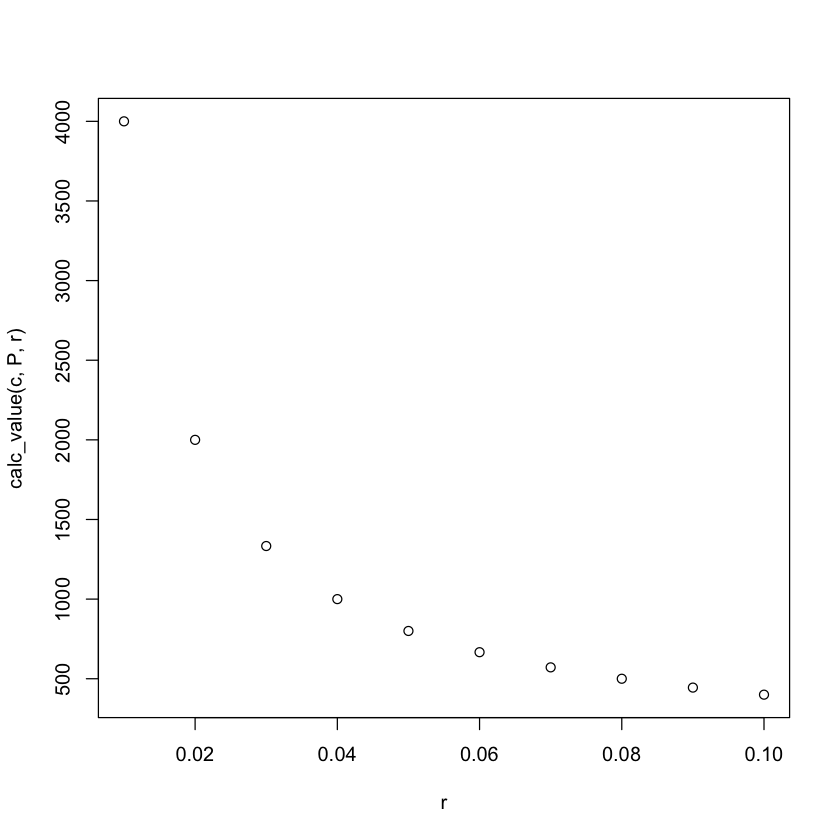

In [7]:
c = 0.04
r = 1:10/100
P = 1000
plot(r,calc_value(c,P,r))

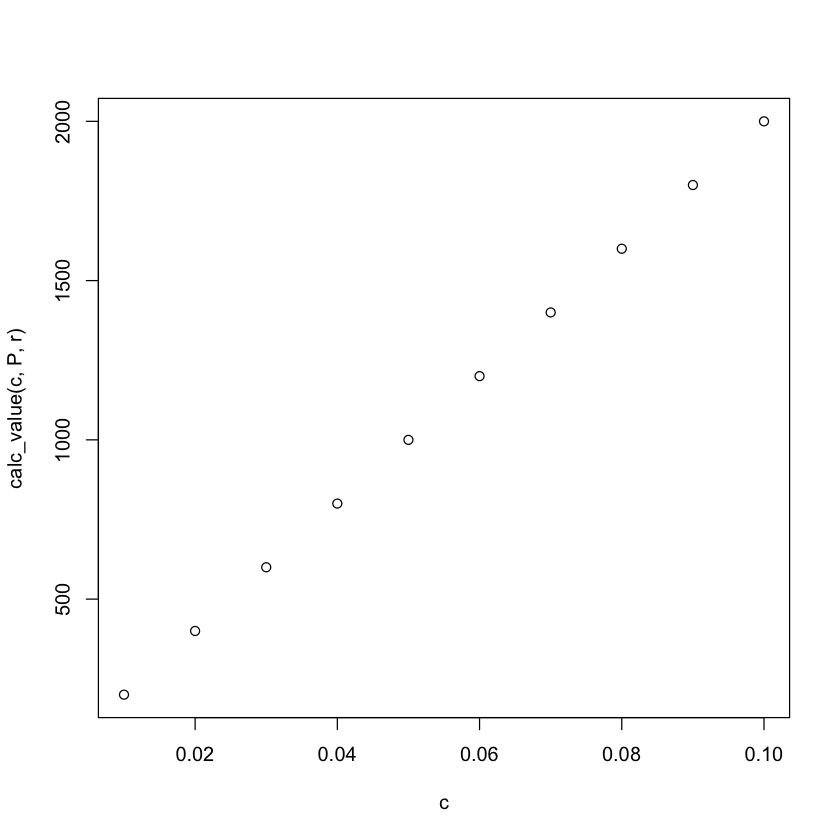

In [8]:
r = 0.05
c = 1:10/100
P = 1000
plot(c,calc_value(c,P,r))

4. Calculate the duration of the bond for $r = 5\%$, $c = 4\%$ and $P = 1000$
and give an interpretation to it. Assume that the interest rate has
increased from $r = 5\%$ to $r = 6\%$. How much would the price of the
bond change, as prescribed by the duration? What is the real change
in the value of the bond? Why those two value are different?

In [9]:
c = 0.04
r = 0.05
P = 1000

##Duration
D= (1+r)/r
D

[1] 21

In [10]:
V0=c*P/r

##change in price approx. by duration

-D/(1+r)*(0.06-0.05)*V0

[1] -160

In [11]:
##real change
V0-c*P/0.06

[1] 133.3333

### Ex. 2
We assume that a random sample $Z_1,\ldots , Z_n$ is Pareto-distributed as defined in the lecture.

1. Derive an inverse sampler for a Pareto-distribution (Note: You are
expected to compute the inverse of CDF).

$F(x)=1-(1+\frac x \beta)^{-\alpha}=y$

$1-y=(1+\frac x \beta)^{-\alpha}$

$(1-y)^{\frac{1}{-\alpha}}=1+\frac x \beta$

$x=\beta\left((1-y)^{\frac{1}{-\alpha}}-1\right)$

$F^{-1}(y)=\beta\left((1-y)^{\frac{1}{-\alpha}}-1\right)$

In [15]:
## sampler
pareto<-function(n,alpha,beta){
    u<-runif(n)
    
    return(beta*((1-u)^(-1/alpha)-1))
}

2. Write a log-likelihood function $\mathcal L(\alpha, \beta)$. Derivate $\mathcal L(\alpha, \beta)$ w.r.t. $\alpha$ and
find a crititical point $\hat \alpha_\beta$ , i.e. a value such that $\frac{\partial}{\partial\alpha}\mathcal L(\hat \alpha_\beta, \beta)=0$ . Argue
that a maximum likelikhood estimator is a point which maximizes the
following function:
$\beta\mapsto\mathcal L(\hat \alpha_\beta, \beta)$

$$\mathcal L(\alpha, \beta)=\sum_{i=0}^n\ln\left[\frac{\alpha/\beta}{\left(1+\frac{x_i}{\beta}\right)^{1+\alpha}}\right] = \sum_{i=0}^n\left[\ln(\alpha)-\ln(\beta)-\ln\left(1+\frac{x_i}{\beta}\right)^{1+\alpha}\right] = n\ln(\alpha)-n\ln(\beta)-\sum_{i=0}^n({1+\alpha})\ln\left[\left(1+\frac{x_i}{\beta}\right)\right]$$


$$0=\frac{\partial}{\partial\alpha}\mathcal L( \alpha, \beta)= \frac{n}{\alpha}-\sum_{i=0}^n\ln\left[\left(1+\frac{x_i}{\beta}\right)\right] \Leftrightarrow \alpha=\frac{n}{\sum_{i=0}^n\ln\left[\left(1+\frac{x_i}{\beta}\right)\right]}$$

3. Write a function which calculates the maximum likelihood estimatetors
given a sample $Z_1,\ldots , Z_n$. Function should be general enough to hand-e different $n$. Hint: As you won't be able to find an estimator analytially, you need to use numerical methods to optimize the log-likelihood
function (as argued in the previous point). Function optimize in R can
be used to find a local minimum numerically.

In [25]:
minusllPareto<-function(z,beta){
    n=length(z)
    hatalphabeta=n/sum(log(1+z/beta))
    
    x=-(n*log(hatalphabeta)-n*log(beta)-(1+hatalphabeta)*sum(log(1+z/beta)))
    return(x)
}

findML<-function(z){
    beta <- optimize(minusllPareto,z=z,interval=c(0,100))$minimum
    
    return(beta)
                   
}



4. Generate $n = 10, 100, 1000, 10000, 1000000$ simulations using the inver-
se sampler (simulations for different n should be drawn independently)
for parameters $\alpha = 5$ and $\beta = 2$. Compute a maximum likelihood estimator $(\alpha_{ML},\beta_{ML})$ for each n using a function from a previous point and prepare a table presenting the estimated parameters for different
$n$. Compare it to the true value of parameters and comment on the
estimation error.

In [34]:
alpha=5
beta=2

ML<-matrix(0,ncol=2,nrow=5)

n=10
z10=pareto(n,alpha,beta)
ML[1,2] <- findML(z10)
ML[1,1] <- n/sum(log(1+z10/beta))


n=100
z100=pareto(n,alpha,beta)
ML[2,2] <- findML(z100)
ML[2,1] <- n/sum(log(1+z100/beta))

n=1000
z1000=pareto(n,alpha,beta)
ML[3,2] <- findML(z1000)
ML[3,1] <- n/sum(log(1+z1000/beta))

n=10000
z10000=pareto(n,alpha,beta)
ML[4,2] <- findML(z10000)
ML[4,1] <- n/sum(log(1+z10000/beta))

n=100000
z100000=pareto(n,alpha,beta)
ML[5,2] <- findML(z100000)
ML[5,1] <- n/sum(log(1+z100000/beta))

In [35]:
ML

[,1]     [,2]     
[1,] 4.487672 99.999931
[2,] 4.315056  1.618279
[3,] 5.243624  1.912879
[4,] 4.986980  2.060250
[5,] 5.011587  1.998778

5. Using the closed-form formula compute mean, standard deviation and 0.025 and 0.975-quantiles for the Pareto-distribution with estimated parameters $(\alpha_{ML},\beta_{ML})$ for each n estimated in the previous
point, as well as for true value of the parameters. Present the values in
the table and comment on them

In [36]:
alpha=c(ML[,1],alpha)
beta=c(ML[,2],beta)

expected=beta/(alpha-1)
standarddev=(expected*alpha/(alpha-2))^0.5
lowerperc=beta*((1-0.025)^(-1/alpha)-1)
upperperc=beta*((1-0.975)^(-1/alpha)-1)

cbind(alpha,beta,expected, standarddev, lowerperc,upperperc)

alpha    beta      expected   standarddev lowerperc   upperperc 
[1,] 4.487672 99.999931 28.6723976 7.1919388   0.565757465 127.505094
[2,] 4.315056  1.618279  0.4881604 0.9538800   0.009522868   2.186466
[3,] 5.243624  1.912879  0.4507654 0.8536421   0.009258293   1.952685
[4,] 4.986980  2.060250  0.5167446 0.9288394   0.010486037   2.256615
[5,] 5.011587  1.998778  0.4982511 0.9105715   0.010123083   2.174100
[6,] 5.000000  2.000000  0.5000000 0.9128709   0.010152806   2.182558

### Ex. 3

We assume the compound Poisson model for $J = 1000$ policies. In this model,
the claim number from all policies is modelled as a random variable $N \sim
Poiss(\lambda)$, $(\lambda = J\mu T , \mu = 0.1, T = 1)$ and the claim size $Z_i$ is distributed
according to lognormal distribution with parameters $\mu = 2, \sigma = 3$. Then the
sum of all claims can be defined as $X=\sum_{i=1}^N Z_i$

1. Compute the expectation and the standard deviation of $X$ using the
closed-form formula proven on the lecture. What is a pure premium
for one policy from that portfolio?



In [40]:
mu=2
sigma=3
lambda=1000*0.1*1


expect_zi=exp(mu+sigma^2/2)

var_zi=expect_zi^2*(exp(sigma^2)-1)

expect_x=expect_zi*lambda
var_x=lambda*(var_zi+expect_zi^2)

print(expect_x)
print(var_x^0.5)

print(expect_x/1000)

[1] 66514.16
[1] 598741.4
[1] 66.51416


2. Write a program which simulates the sum of claims $X$ and simulate
$n = 10, 100, 1000, 10000$ simulations. Compute the mean and standard
deviation from the simulation for dierent n and compare it with point 1.

In [44]:
simulate_compound_poiss<-function(n,lambda,mu,sigma){
    N<-rpois(n,lambda)
    X<-rep(0,times=n)
    for (i in 1:n){
        Z <- rlnorm(N[i],mu,sigma)
        X[i] <- sum(Z)
    }
    return(X)
}

n=10
X= simulate_compound_poiss(n,lambda,mu,sigma)
print(paste0("n=",n))
print(mean(X))
print(sd(X))

n=100
X= simulate_compound_poiss(n,lambda,mu,sigma)
print(paste0("n=",n))
print(mean(X))
print(sd(X))

n=1000
X= simulate_compound_poiss(n,lambda,mu,sigma)
print(paste0("n=",n))
print(mean(X))
print(sd(X))

n=10000
X= simulate_compound_poiss(n,lambda,mu,sigma)
print(paste0("n=",n))
print(mean(X))
print(sd(X))

[1] "n=10"
[1] 30649.11
[1] 27758.73
[1] "n=100"
[1] 80877.4
[1] 332725.1
[1] "n=1000"
[1] 81483.14
[1] 443591.6
[1] "n=10000"
[1] 65958.55
[1] 265463.4
